# Import

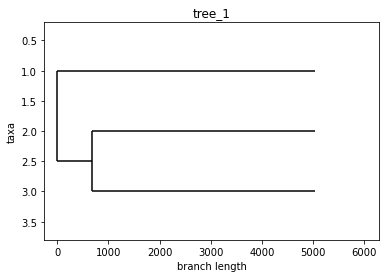

In [1]:
import os
from Bio import Phylo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors, gridspec
import scipy


CURRENT_YEAR = 2021

SEQ_LEN = 4421 + 4218849

# timetree
    

divtree_path  = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main/iqtree/all/chromosome/prune/filter5/iqtree.filter.nex"
timetree_path = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main/lsd/all/chromosome/prune/filter5/lsd.filter.nex"
dates_path    = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main/beast/all/chromosome/prune/filter5/beast.dates.txt"
metadata_path = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main/lsd/all/chromosome/prune/filter5/metadata.tsv"
mcctree_path = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main/beast/all/chromosome/prune/filter5/ultrametric/beast_10M_mcc_hpd95_1-PRE.nex"

# Import tree
divtree = Phylo.read(divtree_path, "nexus")
divtree.ladderize(reverse=False)

timetree = Phylo.read(timetree_path, "nexus")
timetree.ladderize(reverse=False)

mcc_tree = Phylo.read(mcctree_path, "nexus")
Phylo.draw(mcc_tree,   show_confidence=False, label_func = lambda x: '', do_show=False, )  

# Import dates
plot_df = pd.read_csv(dates_path, sep='\t', header=None)
plot_df.columns = ["sample", "date_bp"]
plot_df.set_index(plot_df.columns[0], inplace=True)
#plot_df["date"] = ["NA"] * len(plot_df)
#plot_df["rtt_dist"] = ["NA"] * len(plot_df)

# import metadata
metadata_df = pd.read_csv(metadata_path, sep='\t')
metadata_df.set_index(metadata_df.columns[0], inplace=True)


In [2]:
# Colors
attr_states = list(dict.fromkeys(metadata_df["branch_major"]))
# Create the custom color map (pyplot)
cmap = plt.get_cmap("rainbow", len(attr_states))
# Convert the color map to a list of RGB values
cmaplist = [cmap(i) for i in range(cmap.N)]
# Convert RGB values to hex colors
attr_hex = [colors.to_hex(col) for col in cmaplist]
hex_dict = {}
    
for rec in plot_df.iterrows():
    sample = rec[0]
    date = CURRENT_YEAR - rec[1]["date_bp"]
    rtt_dist = divtree.distance(sample)
    if sample == "Reference":
        branch_major = "1.ORI"
        branch_minor = "1.ORI1"
    else:
        branch_major = metadata_df["branch_major"][sample]
        branch_minor = metadata_df["branch_minor"][sample]

    plot_df.at[sample, "date"] = date
    plot_df.at[sample, "rtt_dist"] = rtt_dist
    plot_df.at[sample, "branch_major"] =  branch_major
    plot_df.at[sample, "branch_minor"] =  branch_minor

    
# Assign states colors based on tip order
i_hex = 0
for c in timetree.get_terminals():
    if c.name == "Reference":
        branch = "1.ORI"
    else:
        branch = metadata_df["branch_major"][c.name]
    if branch not in hex_dict:
        hex_dict[branch] = attr_hex[i_hex]
        i_hex += 1
    plot_df.at[c.name, "branch_major_color"] = hex_dict[branch]


# Parse comment
"""comment_str = c.comment.lstrip("[").rstrip("]").replace('"', "").replace("&","").replace("}","").replace("{","")
# If a comma is surround by numbers, its an interval value
i_comma = 0
for i in range(0, len(comment_str)):
    if comment_str[i] == "," and not ((comment_str[i - 1].isnumeric()) and comment_str[i + 1].isnumeric()):
        attr = comment_str[i_comma:i]
        attr_name = attr.split("=")[0]
        attr_val = attr.split("=")[1].split(",")
        # Try to convert to numeric
        attr_val = [float(v) for v in attr_val]
        rtt_dict[c.name][attr_name] = attr_val
        i_comma = i + 1"""

display(plot_df)

,date_bp,date,rtt_dist,branch_major,branch_minor,branch_major_color
sample,,,,,,
Reference,29.0,1992.0,0.000064,1.ORI,1.ORI1,#ff964f
GCA_009909635.1_ASM990963v1_genomic,98.0,1923.0,0.000068,2.MED,2.MED1,#ff0000
GCA_009669545.1_ASM966954v1_genomic,15.0,2006.0,0.000049,0.ANT,0.ANT1,#1996f3
GCA_009669805.1_ASM966980v1_genomic,41.0,1980.0,0.000049,0.ANT,0.ANT1,#1996f3
GCA_009296005.1_ASM929600v1_genomic,68.0,1953.0,0.000065,2.MED,2.MED1,#ff0000
...,...,...,...,...,...,...
SAMEA7313236_38,253.5,1767.5,0.000075,1.PRE,1.PRE1,#1acee3
SAMEA7313243_45,471.0,1550.0,0.000068,1.PRE,1.PRE1,#1acee3
SAMEA7313246_49,471.0,1550.0,0.000054,1.PRE,1.PRE1,#1acee3


In [3]:
print(hex_dict)

{'0.PRE': '#8000ff', '0.PE': '#4c4ffc', '0.ANT': '#1996f3', '1.PRE': '#1acee3', '4.ANT': '#4df3ce', '3.ANT': '#80ffb4', '1.ANT': '#b3f396', '1.IN': '#e6ce74', '1.ORI': '#ff964f', '2.ANT': '#ff4f28', '2.MED': '#ff0000'}


# Root To Tip Regression

In [108]:
def plot_rtt(df, fig, ax):
    """
    Plot root to tip distances.
    """
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df["date"],df["rtt_dist"])
    r2 = r_value * r_value    
    y_intercept = CURRENT_YEAR - (0 - intercept)/slope
    p_sig = ""
    p_thresh = 0.05    
    if p_value < p_thresh:
        p_sig = "*"
        
    mut_per_year = SEQ_LEN * slope
    year_per_mut = 1 / mut_per_year
        
        
    sns.regplot(
        ax=ax,
        data=df, 
        x="date", 
        y="rtt_dist", 
        scatter_kws={"s": 0},
        color="grey",
        label=(
        "   R2: {}".format(round(r2,2))
        + "\n     p: {:.2e}{}".format(p_value, p_sig)
        + "\nRate: {:.2} +/ {:.2}".format(slope, std_err)  
        + "\n         {} years/substitution".format(round(year_per_mut))
        + "\nRoot: {} YBP".format(round(y_intercept))                
        )
    )

    sns.scatterplot(
        ax=ax,
        data=df, 
        x="date",
        s=10,
        y="rtt_dist", 
        c = df["branch_major_color"], 
        ec = "black",
        alpha=0.75,
    )
    
    ax.set_xlabel("Date")
    ax.set_ylabel("")
    ax.set_title(label)
    xlim = ax.get_xlim()
    x_buff = round((xlim[1] - xlim[0]) * 0.1,1)
    new_xlim = [xlim[0]-x_buff, xlim[1]+x_buff]
    if new_xlim[1] > CURRENT_YEAR:
        new_xlim = [new_xlim[0], CURRENT_YEAR]
    ax.set_xlim(new_xlim)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))  
    
    legend = ax.legend(borderpad=0.8, handletextpad=-2, bbox_to_anchor=(0.5, -0.60), loc='center', fontsize=4)
    frame = legend.get_frame()
    frame.set_edgecolor("black")
    frame.set_linewidth(0.5)
    
    for spine in ax.spines:
        ax.spines[spine].set_linewidth(0.5)

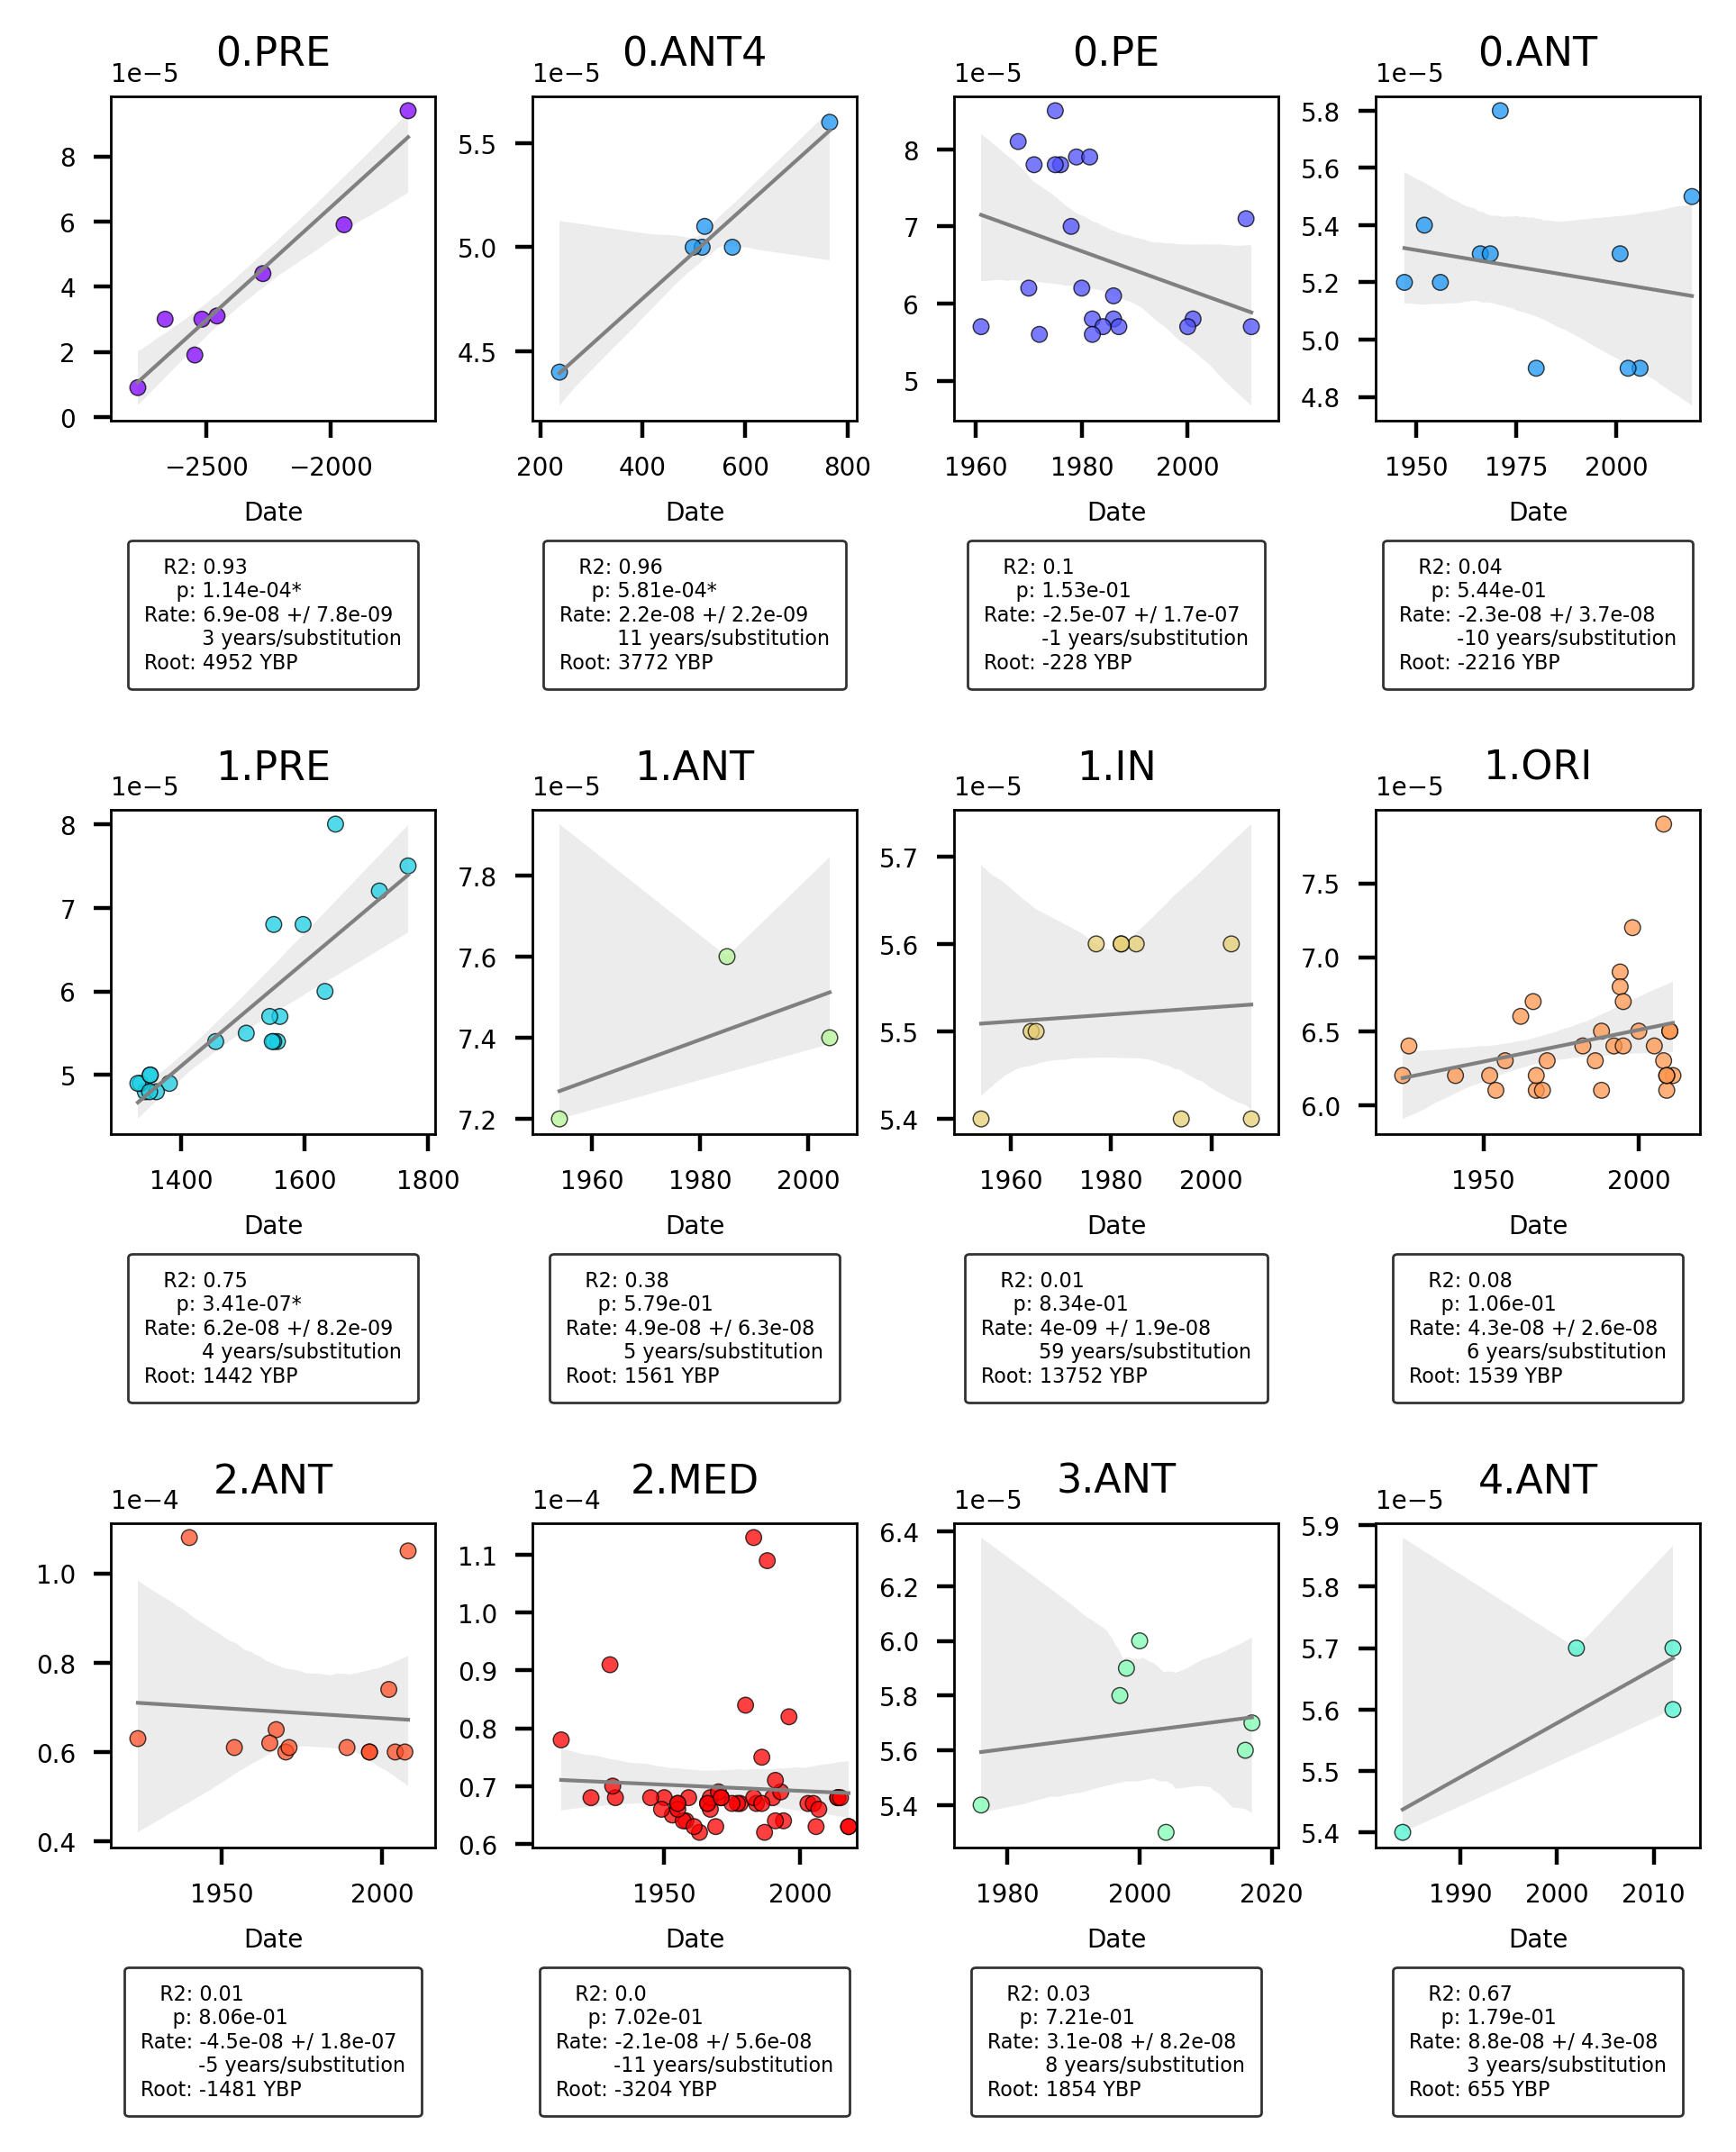

In [109]:
TARGET_RES = [720, 720]
DPI=400
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
SM_FONT = 5
MED_FONT = 8
LG_FONT = 10

plt.rc("font", size=SM_FONT)  # controls default text sizes
plt.rc("lines", linewidth=0.5)
plt.rc("figure", titlesize=LG_FONT)  # fontsize of the figure title
plt.rc("legend", title_fontsize=MED_FONT)  # fontsize of the legend title
plt.rc("legend", frameon=True)  # legend frame
plt.rc("axes", labelsize=SM_FONT)  # fontsize of the x and y labels
plt.rc("axes", titlesize=MED_FONT)  # fontsize of axis titles

fig=plt.figure(figsize=FIGSIZE, dpi=DPI) 

# Creating two axes
# add_axes([xmin,ymin,dx,dy])
axes = []

branch_list = {
    "0.PRE": ["0.PRE1", "0.PRE2"], 
    "0.ANT4" : ["0.ANT4"], 
    "0.PE": ["0.PE2", "0.PE4m", "0.PE4t", "0.PE4a", "0.PE5"],   
    "0.ANT": ["0.ANT1", "0.ANT2","0.ANT3","0.ANT5"],     
}

row_x = 0
row_y = 0
ax_x_buff = 0.40
ax_size = (1/len(branch_list)) * 2

for label in branch_list:
    # Setup axis
    axes.append(fig.add_axes([row_x,row_y,ax_size,ax_size]))
    row_x += 1/len(branch_list) + ax_x_buff
    
    branches = branch_list[label]
    df = plot_df[plot_df["branch_minor"].isin(branches)]    
    plot_rtt(df=df, fig=fig, ax=axes[-1])
    if i == 0:
        axes[-1].set_ylabel("Root to Tip Distance")           
    i += 1

# ------------------------------------------------------------
# Branch 1 
branch_list = {
    "1.PRE" : ["1.PRE1", "1.PRE2", "1.PRE3"],    
    "1.ANT": ["1.ANT1"], 
    "1.IN": ["1.IN1","1.IN2","1.IN3"],   
    "1.ORI" : ["1.ORI1", "1.ORI2", "1.ORI3"]
}
row_x = 0
row_y = -1.1
ax_x_buff = 0.40
ax_size = (1/len(branch_list)) * 2
for label in branch_list:
    axes.append(fig.add_axes([row_x,row_y,ax_size,ax_size]))
    row_x += 1/len(branch_list) + ax_x_buff
    branches = branch_list[label]
    df = plot_df[plot_df["branch_minor"].isin(branches)]    
    plot_rtt(df=df, fig=fig, ax=axes[-1])
    if i == 0:
        axes[-1].set_ylabel("Root to Tip Distance")    
    i += 1  
    
# ------------------------------------------------------------
# Branch 2,3,4
branch_list = {
    "2.ANT": ["2.ANT1","2.ANT2","2.ANT3" ], 
    "2.MED": ["2.MED0", "2.MED1","2.MED2","2.MED3" ], 
    "3.ANT": ["3.ANT1", "3.ANT2" ],     
    "4.ANT": ["4.ANT1" ],           
}

row_x = 0
row_y = -2.2
ax_x_buff = 0.40
ax_size = (1/len(branch_list)) * 2
for label in branch_list:
    axes.append(fig.add_axes([row_x,row_y,ax_size,ax_size]))
    row_x += 1/len(branch_list) + ax_x_buff
    branches = branch_list[label]
    df = plot_df[plot_df["branch_minor"].isin(branches)]    
    plot_rtt(df=df, fig=fig, ax=axes[-1])
    if i == 0:
        axes[-1].set_ylabel("Root to Tip Distance")    
    i += 1
    
plt.savefig("rtt.png", bbox_inches="tight")
plt.savefig("rtt.svg", bbox_inches="tight")